In [64]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/gld_price_data.csv')

In [3]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [5]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [6]:
correlation=data.corr()

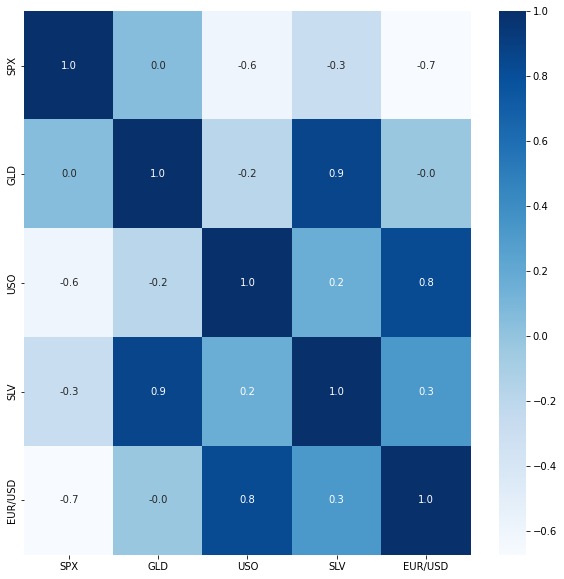

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,fmt='.1f',annot=True,cmap='Blues')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


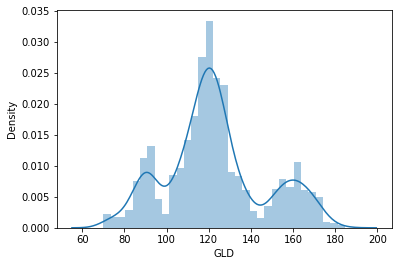

In [12]:
sns.distplot(data['GLD'])

In [46]:
features=data.drop(['Date','GLD'],axis=1)
target=data['GLD']

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=1)

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lr=LinearRegression()

In [51]:
pred=lr.fit(x_train,y_train).predict(x_test)

In [52]:
from sklearn import  metrics

In [53]:
metrics.r2_score(y_test,pred)

0.8696713120900417

In [54]:
print('R Squared error is ',metrics.r2_score(y_test,pred))

R Squared error is  0.8696713120900417


In [55]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
regressor=RandomForestRegressor()

In [57]:
reg_pred=regressor.fit(x_train,y_train).predict(x_test)

In [58]:
metrics.r2_score(y_test,reg_pred)

0.9880246656217632

In [59]:
print('R Squared error is ',metrics.r2_score(y_test,reg_pred))

R Squared error is  0.9880246656217632


In [60]:
Y_test=list(y_test)

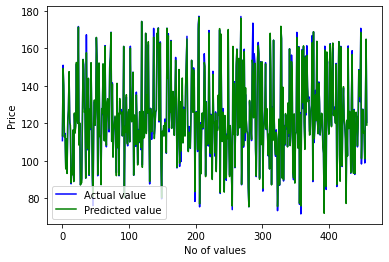

In [63]:
#Compare Actual and Predicted values
plt.plot(Y_test,color='blue',label='Actual value')
plt.plot(reg_pred,color='green',label='Predicted value')
plt.xlabel('No of values')
plt.ylabel('Price')
plt.legend()
plt.show()